# Project - Comcast Telecom Consumer Complaints

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set working directory
import io
%cd "F:\Akshay\Simplilearn\Electives\PYTHON_DATA_SCIENCE\PROJECTS\Comcast Telecom Consumer Complaints"

F:\Akshay\Simplilearn\Electives\PYTHON_DATA_SCIENCE\PROJECTS\Comcast Telecom Consumer Complaints


# Analysis Task

# 1. Import data into Python environment

In [3]:
# Import the dataset
Comcast_data = pd.read_csv('Comcast_telecom_complaints_data.csv')
Comcast_data.head() # first 5 records

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
Comcast_data.dtypes # check datatypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [5]:
Comcast_data.describe(include='all') # brief description of the dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,244072,Comcast,24-06-15,24-Jun-15,11:40:30 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
Comcast_data.shape # Rows and Columns

(2224, 11)

In [7]:
# Check for missing values
Comcast_data.isnull().sum().sort_values(ascending=False)

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

# There are no missing values in the dataset

In [8]:
# Replacing District Of Columbia by District of Columbia
Comcast_data.State.replace('District Of Columbia','District of Columbia',inplace=True)

# 2. Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [9]:
# Converting Date, Date_month_year, Time into datetime datatype
Comcast_data.Date = pd.to_datetime(Comcast_data.Date)
Comcast_data.Date_month_year = pd.to_datetime(Comcast_data.Date_month_year)
Comcast_data.Time = pd.to_datetime(Comcast_data.Time)

In [10]:
Comcast_data.dtypes # Check datatypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                           datetime64[ns]
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [11]:
# Extracting Month Name, Day and Day name from Date column for analysis
Comcast_data['Month'] = pd.DatetimeIndex(Comcast_data.Date).month_name()
Comcast_data['Day'] = pd.DatetimeIndex(Comcast_data.Date).day
Comcast_data['Day_name'] = pd.DatetimeIndex(Comcast_data.Date).day_name()

In [12]:
Comcast_data.head() # first 5 records

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,Day_name
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,2021-06-23 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Wednesday
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,2021-06-23 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,April,8,Wednesday
2,242732,Speed and Service,2015-04-18,2015-04-18,2021-06-23 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Saturday
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,2021-06-23 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,May,7,Thursday
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,2021-06-23 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,May,26,Tuesday


In [13]:
# Creating data for Month-wise complaint
Monthly_Complaint = Comcast_data.groupby('Month').count().reset_index()
Monthly_Complaint

,Month,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Day_name
0,April,545,545,545,545,545,545,545,545,545,545,545,545,545
1,June,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280
2,May,399,399,399,399,399,399,399,399,399,399,399,399,399


In [14]:
# Rearranging the data according to month name
Monthly_Complaint = Monthly_Complaint.reindex([0,2,1])
Monthly_Complaint

,Month,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Day_name
0,April,545,545,545,545,545,545,545,545,545,545,545,545,545
2,May,399,399,399,399,399,399,399,399,399,399,399,399,399
1,June,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280


<Figure size 720x576 with 0 Axes>

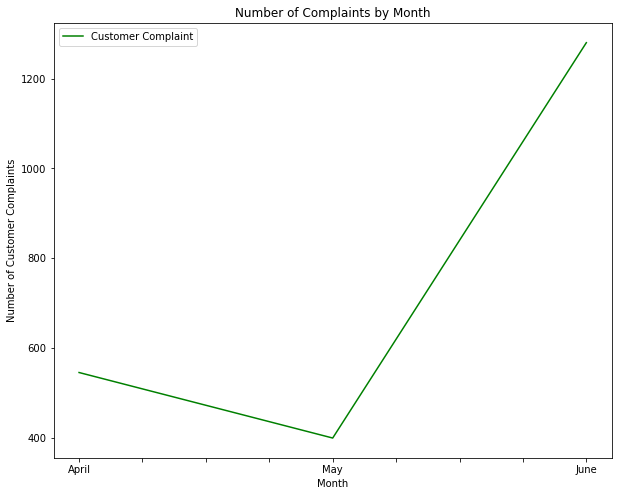

In [15]:
# Lets create a trend chart for Monthly_Complaint
plt.figure(figsize=(10,8))
Monthly_Complaint.plot(x='Month',y='Customer Complaint',kind='line',color='green')
plt.xlabel('Month')
plt.ylabel('Number of Customer Complaints')
plt.title('Number of Complaints by Month')
plt.gcf().set_size_inches(10,8)
plt.show()

# From above analysis we found that the maximum number of complaints are in the month of June = 1280

In [16]:
# Creating data for day-wise complaint
Daily_Complaint = Comcast_data.groupby('Day').count().reset_index()
Daily_Complaint

,Day,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day_name
0,1,55,55,55,55,55,55,55,55,55,55,55,55,55
1,2,59,59,59,59,59,59,59,59,59,59,59,59,59
2,3,45,45,45,45,45,45,45,45,45,45,45,45,45
3,4,36,36,36,36,36,36,36,36,36,36,36,36,36
4,5,49,49,49,49,49,49,49,49,49,49,49,49,49
5,6,38,38,38,38,38,38,38,38,38,38,38,38,38
6,7,49,49,49,49,49,49,49,49,49,49,49,49,49
7,8,67,67,67,67,67,67,67,67,67,67,67,67,67
8,9,55,55,55,55,55,55,55,55,55,55,55,55,55
9,10,53,53,53,53,53,53,53,53,53,53,53,53,53


<Figure size 720x576 with 0 Axes>

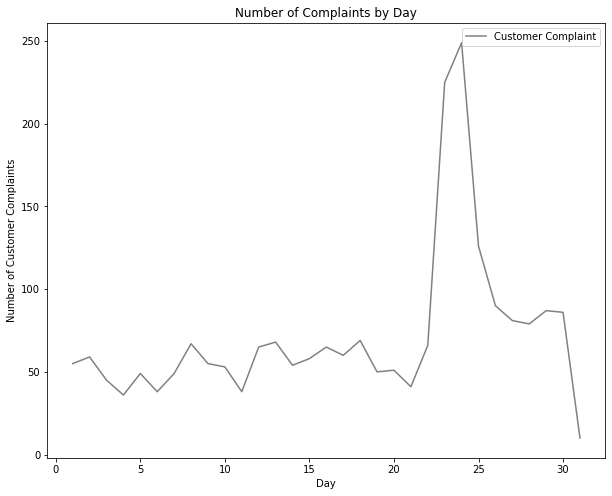

In [17]:
# Lets create a trend chart for Daily_Complaint
plt.figure(figsize=(10,8))
Daily_Complaint.plot(x='Day',y='Customer Complaint',kind='line',color='grey')
plt.xlabel('Day')
plt.ylabel('Number of Customer Complaints')
plt.title('Number of Complaints by Day')
plt.gcf().set_size_inches(10,8)
plt.show()

# From above analysis we found that the maximum complaints are in 24th day = 249

In [18]:
# Creating data for day-name-wise complaint
Dayname_Complaint = Comcast_data.groupby('Day_name').count().reset_index()
Dayname_Complaint

,Day_name,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,Friday,304,304,304,304,304,304,304,304,304,304,304,304,304
1,Monday,296,296,296,296,296,296,296,296,296,296,296,296,296
2,Saturday,194,194,194,194,194,194,194,194,194,194,194,194,194
3,Sunday,138,138,138,138,138,138,138,138,138,138,138,138,138
4,Thursday,366,366,366,366,366,366,366,366,366,366,366,366,366
5,Tuesday,466,466,466,466,466,466,466,466,466,466,466,466,466
6,Wednesday,460,460,460,460,460,460,460,460,460,460,460,460,460


In [19]:
# Rearranging data according to Monday - Sunday
Dayname_Complaint = Dayname_Complaint.reindex([1,5,6,4,0,2,3])
Dayname_Complaint

,Day_name,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
1,Monday,296,296,296,296,296,296,296,296,296,296,296,296,296
5,Tuesday,466,466,466,466,466,466,466,466,466,466,466,466,466
6,Wednesday,460,460,460,460,460,460,460,460,460,460,460,460,460
4,Thursday,366,366,366,366,366,366,366,366,366,366,366,366,366
0,Friday,304,304,304,304,304,304,304,304,304,304,304,304,304
2,Saturday,194,194,194,194,194,194,194,194,194,194,194,194,194
3,Sunday,138,138,138,138,138,138,138,138,138,138,138,138,138


<Figure size 720x576 with 0 Axes>

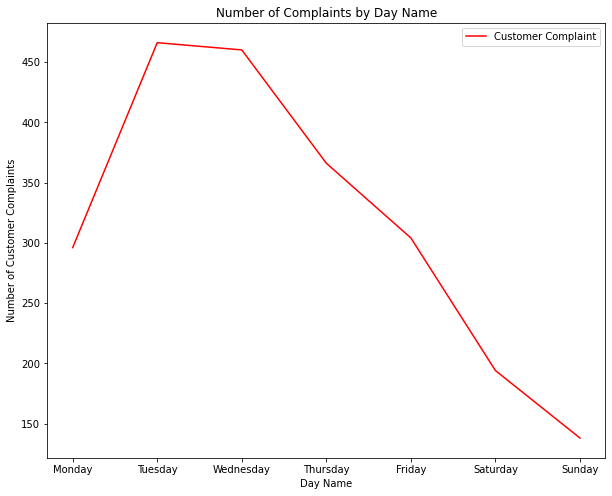

In [20]:
# Lets create a trend chart for Dayname_Complaint
plt.figure(figsize=(10,8))
Dayname_Complaint.plot(x='Day_name',y='Customer Complaint',kind='line',color='red')
plt.xlabel('Day Name')
plt.ylabel('Number of Customer Complaints')
plt.title('Number of Complaints by Day Name')
plt.gcf().set_size_inches(10,8)
plt.show()

# From above analysis we found that the maximum complaints are on Tuesday = 466

# 3. Provide a table with the frequency of complaint types

In [21]:
Complaint_type_frequency = Comcast_data['Customer Complaint'].value_counts()
Complaint_type_frequency

Comcast                                             83
Comcast Internet                                    18
Comcast Data Cap                                    17
comcast                                             13
Data Caps                                           11
                                                    ..
Ridiculous and inconsistent billing                  1
Comcast and competition                              1
Comcast Rate Hike                                    1
Comcast Fraud?                                       1
Comcast (Xfinity) Monopolistic Billing Practices     1
Name: Customer Complaint, Length: 1841, dtype: int64

# From above table we can see that maximum complaint are of Comcast = 83

# 4. Which complaint types are maximum i.e., around internet, network issues, or across any other domains

In [22]:
# importing required libraries
import nltk
from wordcloud import WordCloud, STOPWORDS

In [23]:
# Creating a new data for Complaint_Name
Complaint_Name = Comcast_data['Customer Complaint'].dropna().tolist()
Complaint_Name = ''.join(Complaint_Name).lower()

In [24]:
# making list of some stopwords
stop_word = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')
for word in stop_word:
    STOPWORDS.add(word)

In [25]:
# creating a wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(Complaint_Name)

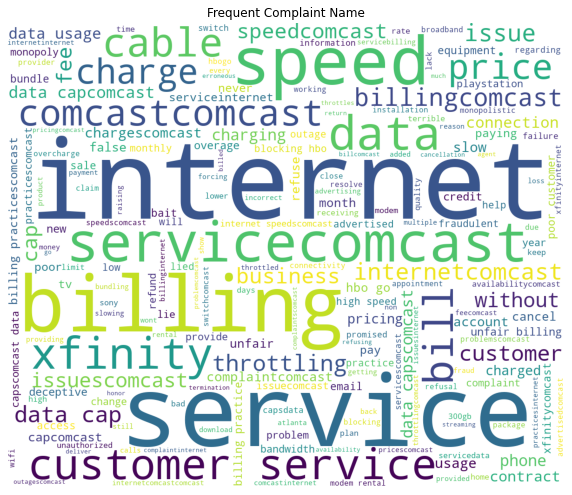

In [26]:
# Creating a wordcloud of complaint names
plt.figure(figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent Complaint Name')
plt.axis('off')
plt.show()

# From above we can see that the complaint type internet is maximum

# 5. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [27]:
# Creating a new variable Current_Status with Open and Closed
Comcast_data['Current_Status'] = ['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status 
                                  in Comcast_data['Status']]
Comcast_data.head() # first 5 records

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,Day_name,Current_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,2021-06-23 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Wednesday,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,2021-06-23 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,April,8,Wednesday,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,2021-06-23 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Saturday,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,2021-06-23 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,May,7,Thursday,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,2021-06-23 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,May,26,Tuesday,Closed


# 6. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [28]:
# Creating a data for State wise complaints Status
State_Complaints_Status = Comcast_data.groupby(['State','Current_Status']).size().unstack().fillna(0)
State_Complaints_Status

Current_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District of Columbia,15.0,2.0
Florida,201.0,39.0


<Figure size 1080x720 with 0 Axes>

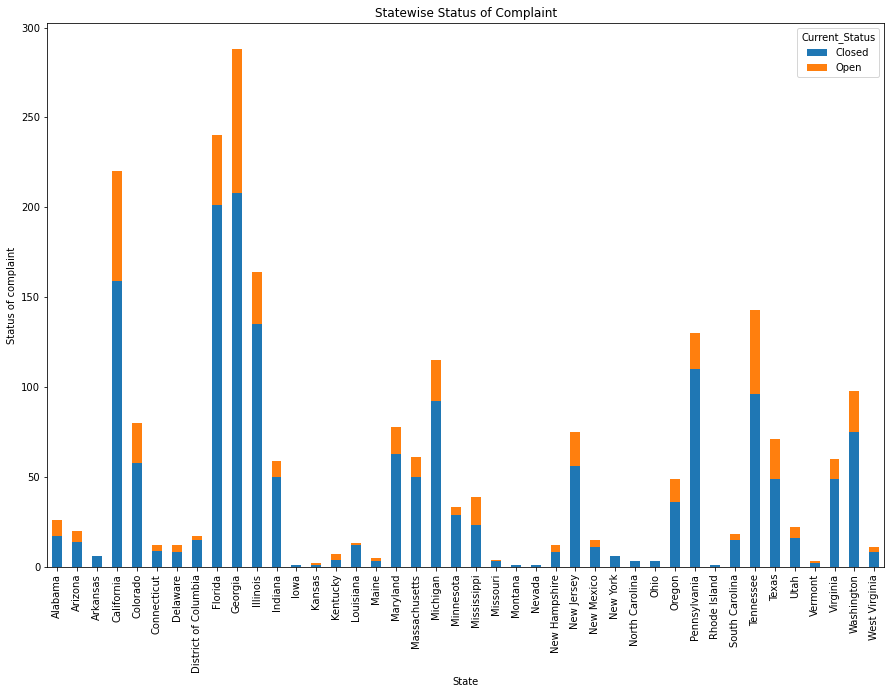

In [29]:
# Lets create a stacked bar chart for State_Complaints_Status
plt.figure(figsize=(15,10))
State_Complaints_Status.plot(kind='bar',stacked=True)
plt.xlabel('State')
plt.ylabel('Status of complaint')
plt.title('Statewise Status of Complaint')
plt.gcf().set_size_inches(15,10)
plt.show()

# 7. Which state has the maximum complaints

In [30]:
# Creating a data for Statewise number of complaints
Statewise_Complaints = Comcast_data.groupby('State').size().sort_values(ascending=False)
Statewise_Complaints

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District of Columbia     17
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

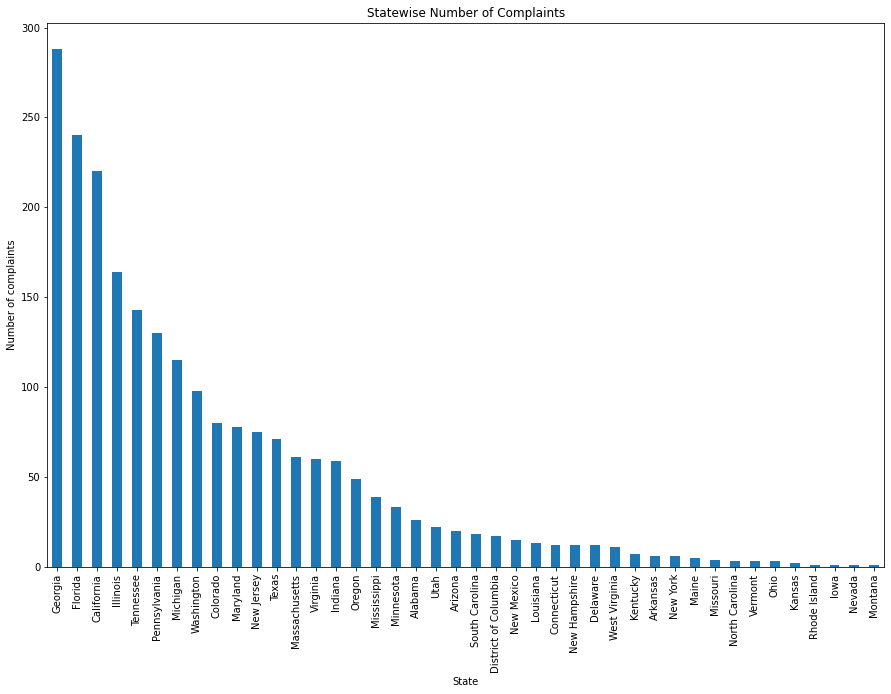

In [31]:
# Lets create a bar chart for Statewise number of complaints
plt.figure(figsize=(15,10))
Statewise_Complaints.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of complaints')
plt.title('Statewise Number of Complaints')
plt.gcf().set_size_inches(15,10)
plt.show()

# From above analysis we found that the state Georgia has maximum number of complaints = 288

# 8. Which state has the highest percentage of unresolved complaints

In [32]:
# Creating a new column for %_Unresolved_Complaints and %_Resolved_Complaints
State_Complaints_Status['%_Unresolved_Complaints'] = State_Complaints_Status['Open']/State_Complaints_Status['Open'].sum()*100
State_Complaints_Status['%_Resolved_Complaints'] = State_Complaints_Status['Closed']/State_Complaints_Status['Closed'].sum()*100
State_Complaints_Status

Current_Status,Closed,Open,%_Unresolved_Complaints,%_Resolved_Complaints
State,,,,
Alabama,17.0,9.0,1.740812,0.995899
Arizona,14.0,6.0,1.160542,0.820152
Arkansas,6.0,0.0,0.000000,0.351494
California,159.0,61.0,11.798839,9.314587
Colorado,58.0,22.0,4.255319,3.397774
Connecticut,9.0,3.0,0.580271,0.527241
Delaware,8.0,4.0,0.773694,0.468658
District of Columbia,15.0,2.0,0.386847,0.878735
Florida,201.0,39.0,7.543520,11.775044


In [33]:
# Sorting the data in descending order according to %_Unresolved_Complaints
State_Complaints_Status.sort_values(ascending=False,by='%_Unresolved_Complaints')

Current_Status,Closed,Open,%_Unresolved_Complaints,%_Resolved_Complaints
State,,,,
Georgia,208.0,80.0,15.473888,12.185120
California,159.0,61.0,11.798839,9.314587
Tennessee,96.0,47.0,9.090909,5.623902
Florida,201.0,39.0,7.543520,11.775044
Illinois,135.0,29.0,5.609284,7.908612
Washington,75.0,23.0,4.448743,4.393673
Michigan,92.0,23.0,4.448743,5.389572
Colorado,58.0,22.0,4.255319,3.397774
Texas,49.0,22.0,4.255319,2.870533


# From above analysis we found that the state Georgia has highest percentage of unresolved complaints = 15.47%

# 9. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [34]:
# Creating a data for complaints and grouping it by Received Via and Current_Status
Complaint_Status = Comcast_data.groupby(['Received Via','Current_Status']).size().unstack().fillna(0)
Complaint_Status

Current_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [35]:
# Creating a new column %_Resolved which gives % of complaints resolved
Complaint_Status['%_Resolved'] = Complaint_Status['Closed'] / Complaint_Status['Closed'].sum()*100
Complaint_Status

Current_Status,Closed,Open,%_Resolved
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


# From above table we can see that the percentage of complaints resolved through the Internet and customer care calls is 50.61% and 49.38% respectively 

# Summary :
# 1. The maximum number of complaints are in the month of June = 1280
# 2. The maximum complaints are on 24th day = 249
# 3. The maximum complaints are on Tuesday = 466
# 4. The maximum complaint are of Comcast = 83
# 5. The complaint type internet is maximum
# 6. We created a new categorical variable Current_Status with value as Open and Closed.
# 7. We provided state wise status of complaints in a stacked bar chart
# 8. The state Georgia has maximum number of complaints = 288
# 9. The state Georgia has highest percentage of unresolved complaints = 15.47%
# 10. The percentage of complaints resolved through the Internet and customer care calls is 50.61% and 49.38% respectively